## NYC Parking Tickets

My goal in this notebook is to try to deal with **real world data**, analyze it and draw valuable conclusions. 

**List of contest**
1. Loading data
2. Basic preprocessing
3. Exploratory analisys
4. Hypothesis testing

In [58]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

1. Loading data: parking violation codes with fine amounts in dollars and the dataset containing parking violations in fiscal year 2015.

In [59]:
fine_amount = pd.read_csv('ParkingViolationCodes.csv')

In [60]:
fine_amount.head()

,VIOLATION CODE,VIOLATION DESCRIPTION,Fine Amount $
0,1,FAILURE TO DISPLAY BUS PERMIT,515
1,2,NO OPERATOR NAM/ADD/PH DISPLAY,515
2,3,UNAUTHORIZED PASSENGER PICK-UP,515
3,4,BUS PARKING IN LOWER MANHATTAN,115
4,5,BUS LANE VIOLATION,50


In [61]:
df2 = pd.read_csv('archive/Parking_Violations_Issued_-_Fiscal_Year_2015.csv', engine='pyarrow')

In [62]:
df2.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Hydrant Violation,Double Parking Violation,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,8002531292,EPC5238,NY,PAS,10/01/2014,21,SUBN,CHEVR,T,20390,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8015318440,5298MD,NY,COM,03/06/2015,14,VAN,FRUEH,T,27790,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7611181981,FYW2775,NY,PAS,07/28/2014,46,SUBN,SUBAR,T,8130,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7445908067,GWE1987,NY,PAS,04/13/2015,19,4DSD,LEXUS,T,59990,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7037692864,T671196C,NY,PAS,05/19/2015,19,4DSD,CHRYS,T,36090,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df2 = df2.join(fine_amount, on='Violation Code', how='inner')

2. Basic preprocessing - droping unused columns and fixing data type.

In [64]:
df2.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation', 'Latitude', 'Longitude', 'Comm

In [65]:
columns_to_drop =[
'Street Code1', 'Street Code2', 'Street Code3', 'Violation Location', 'Violation Precinct',
'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad', 'Time First Observed',
'Law Section', 'Issuing Agency',
'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
'Unregistered Vehicle?', 'Meter Number',
'Feet From Curb', 'Violation Post Code', 'Violation Description',
'No Standing or Stopping Violation', 'Hydrant Violation',
'Double Parking Violation', 'Latitude', 'Longitude', 'Community Board',
'Community Council ', 'Census Tract', 'BIN', 'BBL', 'NTA', 'VIOLATION CODE', 'VIOLATION DESCRIPTION'
]

In [66]:
df2 = df2.drop(columns=columns_to_drop)

In [67]:
df2.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Vehicle Expiration Date', 'Violation Time', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'From Hours In Effect',
       'To Hours In Effect', 'Vehicle Color', 'Vehicle Year', 'Fine Amount $'],
      dtype='object')

In [70]:
print(f"We have {len(df2['Summons Number'])} records in the dataset.")

We have 11747287 records in the dataset.


In [71]:
# Convert 'Violation Time' to a standardized datetime format
vt = df2['Violation Time'].str.upper().str.replace('A', 'AM').str.replace('P', 'PM')
vt = vt.str[:2] + ':' + vt.str[2:4] + vt.str[4:]
vt = vt.str.replace('^00', '12', regex=True)
df2['Violation Hour'] = pd.to_datetime(vt, format='%I:%M%p', errors='coerce')

In [72]:
# Extract hour as a numeric value
df2['Violation_Hour_Num'] = df2['Violation Hour'].dt.hour

In [73]:
# Convert 'Issue Date' to datetime
df2['Issue Date'] = pd.to_datetime(df2['Issue Date'], format="%m/%d/%Y")

In [74]:
# Convert 'Vehicle Expiration Date' to datetime
df2['Vehicle Expiration'] = df2['Vehicle Expiration Date'].str[:10]
df2['Vehicle Expiration'] = pd.to_datetime(df2['Vehicle Expiration'], format="%m/%d/%Y", errors='coerce')


In [75]:
df2.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Vehicle Expiration Date,Violation Time,...,Intersecting Street,Date First Observed,From Hours In Effect,To Hours In Effect,Vehicle Color,Vehicle Year,Fine Amount $,Violation Hour,Violation_Hour_Num,Vehicle Expiration
0,8002531292,EPC5238,NY,PAS,2014-10-01,21,SUBN,CHEVR,01/01/20150111 12:00:00 PM,0011A,...,None,01/05/0001 12:00:00 PM,1200A,0300A,BL,2005.0,115,1900-01-01 00:11:00,0.0,2015-01-01
1,8015318440,5298MD,NY,COM,2015-03-06,14,VAN,FRUEH,01/01/88888888 12:00:00 PM,0942A,...,None,01/05/0001 12:00:00 PM,0700A,1000A,BROWN,0.0,115,1900-01-01 09:42:00,9.0,NaT
2,7611181981,FYW2775,NY,PAS,2014-07-28,46,SUBN,SUBAR,01/01/20160524 12:00:00 PM,1020A,...,None,01/05/0001 12:00:00 PM,None,None,BLACK,2010.0,115,1900-01-01 10:20:00,10.0,2016-01-01
3,7445908067,GWE1987,NY,PAS,2015-04-13,19,4DSD,LEXUS,01/01/20170111 12:00:00 PM,0318P,...,None,01/05/0001 12:00:00 PM,0300P,1000P,GY,2015.0,60,1900-01-01 15:18:00,15.0,2017-01-01
4,7037692864,T671196C,NY,PAS,2015-05-19,19,4DSD,CHRYS,01/01/88888888 12:00:00 PM,0410P,...,None,01/05/0001 12:00:00 PM,None,None,BLACK,0.0,60,1900-01-01 16:10:00,16.0,NaT


3. Exploratory data analysis: trying to observe something interesting

In [76]:
states = df2.groupby('Registration State')['Summons Number'].count()
states = pd.DataFrame(states)
states = states.sort_values(by='Summons Number', ascending=False)
states.columns = ['Number of Violations']
states['percentage']= round(states['Number of Violations'] / states['Number of Violations'].sum() * 100,2)
states.head(n=10)

,Number of Violations,percentage
Registration State,,
NY,9146731,77.86
NJ,1077010,9.17
PA,296293,2.52
CT,159306,1.36
FL,147518,1.26
MA,100462,0.86
IN,83111,0.71
VA,80606,0.69
MD,62934,0.54


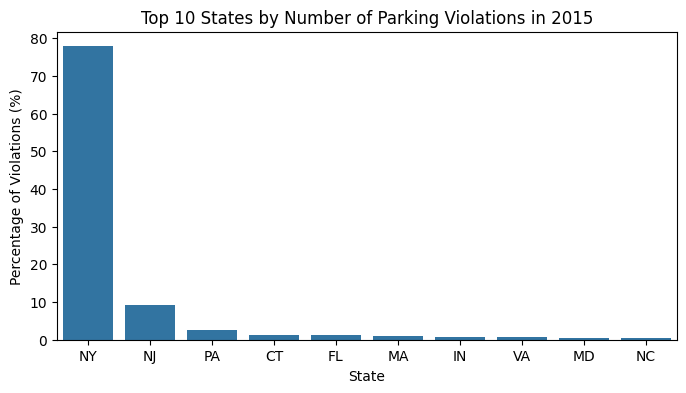

In [77]:
plt.figure(figsize=(8,4))
sns.barplot(x=states.index[:10], y=states['percentage'][:10])
plt.title('Top 10 States by Number of Parking Violations in 2015')
plt.xlabel('State')
plt.ylabel('Percentage of Violations (%)')
plt.show()

**Key insights**
- Almost 78% of all violations were made by cars registered in **New York**, which is expected as we are analyzing New York City.
- Approximately one in ten parking tickets were given to cars registered in neighboring **New Jersey**.
- 2.5% of violations were made by cars from **Pennsylvania**, which does not directly border New York City.

In [78]:
violation = df2.groupby('Violation Code')['Summons Number'].count()
violation = pd.DataFrame(violation)
violation = violation.sort_values(by='Summons Number', ascending=False)
violation.columns = ['Number of Violations']
violation['percentage']= round(violation['Number of Violations'] / violation['Number of Violations'].sum() * 100,2)
violation.head(n=10)

,Number of Violations,percentage
Violation Code,,
21,1630912,13.88
38,1418627,12.08
14,988469,8.41
36,839197,7.14
37,795918,6.78
7,719753,6.13
20,662904,5.64
46,595709,5.07
71,576940,4.91


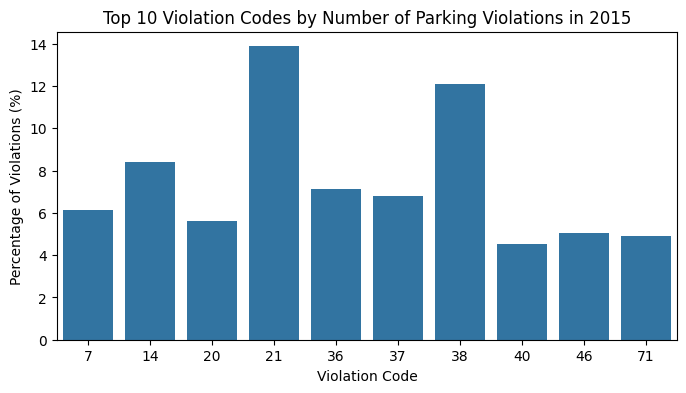

In [79]:
plt.figure(figsize=(8,4))
sns.barplot(x=violation.index[:10], y=violation['percentage'][:10])
plt.title('Top 10 Violation Codes by Number of Parking Violations in 2015')
plt.xlabel('Violation Code')
plt.ylabel('Percentage of Violations (%)')
plt.show()

In [81]:
fine_amount[fine_amount['VIOLATION CODE'] == 21]

,VIOLATION CODE,VIOLATION DESCRIPTION,Fine Amount $
20,21,NO PARKING-STREET CLEANING,45


In [82]:
fine_amount[fine_amount['VIOLATION CODE'] == 38]

,VIOLATION CODE,VIOLATION DESCRIPTION,Fine Amount $
37,38,FAIL TO DSPLY MUNI METER RECPT,35


**Key insights**
- Violation Code 21 (NO PARKING – STREET CLEANING, fine $45) is the most frequent, accounting for 13.88% of violations, followed closely by Code 38 (FAIL TO DISPLAY MUNI METER RECEIPT, fine $35) at 12.08%.

- The top three violation codes (21, 38, and 14) together make up over 34% of all violations, highlighting their prominence.

- Despite the dominance of these top codes, the overall distribution of violations is fairly spread out, showing that issues occur across many categories rather than being concentrated in a single area.

In [83]:
df2['Day of week'] = pd.DatetimeIndex(df2['Issue Date']).dayofweek #0=monday, 6=sunday
df2['Month'] = pd.DatetimeIndex(df2['Issue Date']).month #1=January, 12=December

In [84]:
day = df2.groupby('Day of week')['Summons Number'].count()
day = pd.DataFrame(day)
day = day.sort_values(by='Summons Number', ascending=False)
day.columns = ['Number of Violations']
day['percentage']= round(day['Number of Violations'] / day['Number of Violations'].sum() * 100,2)   
day

,Number of Violations,percentage
Day of week,,
1,2090545,17.80
4,2061979,17.55
3,2046276,17.42
2,1967772,16.75
0,1846630,15.72
5,1234556,10.51
6,499529,4.25


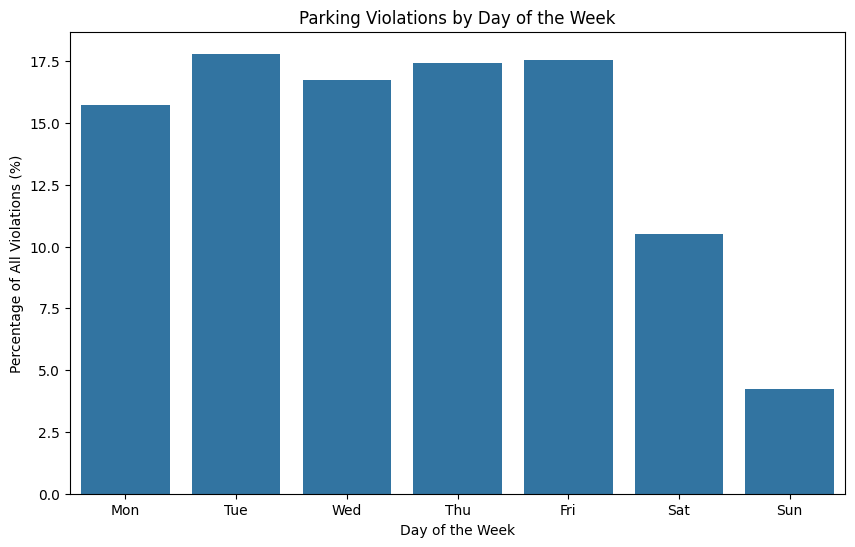

In [85]:
plt.figure(figsize=(10,6))
sns.barplot(x=day.index, y=day['percentage'])
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Parking Violations by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Percentage of All Violations (%)')
plt.show()


**Key insights**
- Tuesdat, Thursday, and Friday have the highest numbers of violations, with Wednesday and Monday coming a bit behind.
- Sunday has by far the lowest number of violations, showing a sharp decrease compared to all other days.
- The distribution of violations is uneven, with significantly higher counts on weekdays and a clear drop during the weekend, suggesting that violation frequency is closely tied to weekday operational or activity levels.

In [86]:
month = df2.groupby('Month')['Summons Number'].count()
month = pd.DataFrame(month)
month = month.sort_values(by='Summons Number', ascending=False)
month.columns = ['Number of Violations']
month['percentage']= round(month['Number of Violations'] / month['Number of Violations'].sum() * 100,2)
month

,Number of Violations,percentage
Month,,
1,1385456,11.79
6,1270147,10.81
5,1035957,8.82
9,1023337,8.71
7,966010,8.22
10,961471,8.18
3,960462,8.18
4,947769,8.07
8,906411,7.72


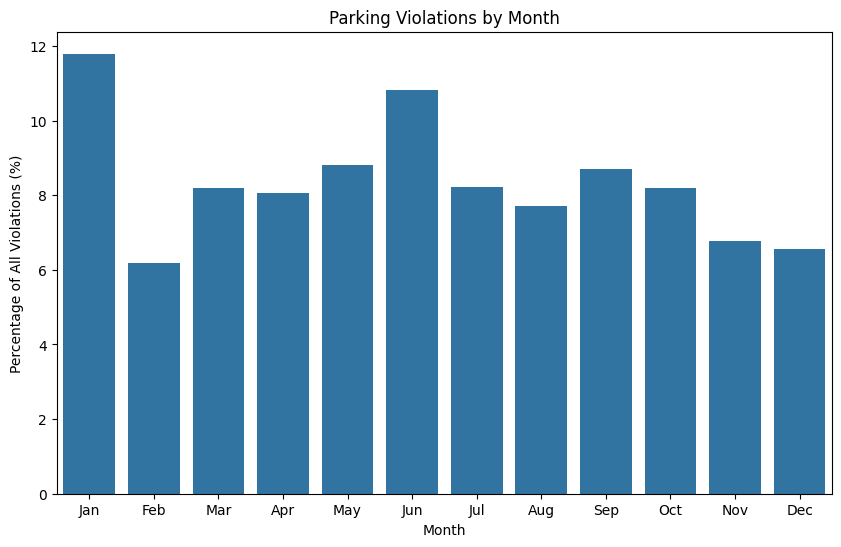

In [87]:
plt.figure(figsize=(10,6))
sns.barplot(x=month.index, y=month['percentage'])
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Parking Violations by Month')
plt.xlabel('Month')
plt.ylabel('Percentage of All Violations (%)')
plt.show()


**Key Insights**
- The fiscal year runs from the beginning of July to the end of June.
- January and June had the highest number of violations in Fiscal Year 2015 (around 11%), likely because January marks the start of the calendar year (“fresh start”) and June is the last month of the fiscal year (catching up with targets).
- Most other months (March–October) show average percentages, indicating that violations are fairly evenly spread throughout the fiscal year.
- February and December had the lowest percentages, likely due to having the fewest working days.

In [27]:
df2['Fine Amount $'].value_counts()

Fine Amount $
115    4724655
35     1923082
60     1811858
65     1384580
45      714948
0       534447
95      378962
265     224560
165      29616
50       10658
515       5544
25        3585
180        622
105        170
Name: count, dtype: int64

**Key insights**
- The most frequent fine is $115, with 4,724,655 occurrences, making it by far the most common.
- $35 and $60 fines are the next most frequent.
- Very high fines (like $265, $515, $180) and very low fines (like $25) are extremely rare.

In [90]:
street = df2.groupby('Street Name')['Summons Number'].count()
street = pd.DataFrame(street)
street = street.sort_values(by='Summons Number', ascending=False)
street.columns = ['Number of Violations']
street['percentage']= round(street['Number of Violations'] / street['Number of Violations'].sum() * 100,2)
street.head(n=10)

,Number of Violations,percentage
Street Name,,
Broadway,240631,2.05
3rd Ave,177046,1.51
5th Ave,118775,1.01
Madison Ave,104333,0.89
Lexington Ave,93355,0.80
2nd Ave,88255,0.75
1st Ave,84207,0.72
7th Ave,73158,0.62
EB SHORE PKWY @ WEST,73004,0.62


Broadway has the highest number of violations (240,631 or 2% of all violations).

In [91]:
vehicle_make = df2.groupby('Vehicle Make')['Summons Number'].count()
vehicle_make = pd.DataFrame(vehicle_make)
vehicle_make = vehicle_make.sort_values(by='Summons Number', ascending=False)
vehicle_make.columns = ['Number of Violations']
vehicle_make['percentage']= round(vehicle_make['Number of Violations'] / vehicle_make['Number of Violations'].sum() * 100,2)
vehicle_make.head(n=10)

,Number of Violations,percentage
Vehicle Make,,
FORD,1515957,12.99
TOYOT,1208695,10.35
HONDA,1094287,9.37
NISSA,901804,7.73
CHEVR,894134,7.66
FRUEH,431931,3.70
DODGE,400986,3.44
ME/BE,384727,3.30
BMW,374695,3.21


FORD vehicles account for the highest share of violations (12.99%), making them the most frequently cited make.

4. Hypothesis testing: are the differences statistically significant?

Association Between Violation Type and Vehicle Registration State (NY vs. Non-NY)

In [92]:
ny_cars = df2[df2['Registration State'] == 'NY']
non_ny_cars = df2[df2['Registration State'] != 'NY']

In [93]:
ny_counts = ny_cars['Violation Code'].value_counts(normalize=True)
non_ny_counts = non_ny_cars['Violation Code'].value_counts(normalize=True)


In [97]:
ny_non_ny_comp = pd.DataFrame({
    'NY': ny_counts,
    'Non-NY': non_ny_counts
}).fillna(0)
ny_non_ny_comp = ny_non_ny_comp.sort_values(by='NY', ascending=False)
ny_non_ny_comp.head(10)

,NY,Non-NY
Violation Code,,
21,0.133423,0.157861
38,0.122527,0.114554
36,0.079738,0.042242
14,0.075265,0.115374
37,0.070317,0.058735
7,0.064912,0.048458
71,0.062841,0.000828
20,0.054873,0.061906
46,0.051220,0.048919


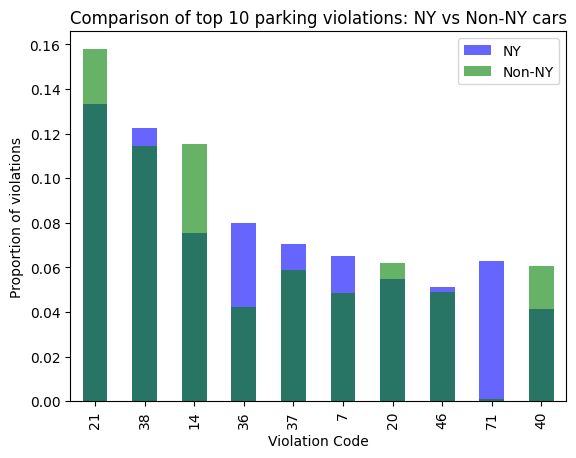

In [94]:
top_10_violations = df2['Violation Code'].value_counts().head(10).index

ny_counts[top_10_violations].plot(kind='bar', alpha=0.6, label='NY', color='blue')
non_ny_counts[top_10_violations].plot(kind='bar', alpha=0.6, label='Non-NY', color='green')

plt.ylabel('Proportion of violations')
plt.title('Comparison of top 10 parking violations: NY vs Non-NY cars')
plt.legend()
plt.show()

In [101]:
fine_amount[fine_amount['VIOLATION CODE'] == 21]

,VIOLATION CODE,VIOLATION DESCRIPTION,Fine Amount $
20,21,NO PARKING-STREET CLEANING,45


**Key insights**
- Violation 71 (INSP. STICKER – EXPIRED/MISSING, fine $65) is highly specific to NY, accounting for 6.28% of violations there versus only 0.08% in Non-NY.
- Violation 36 (PHOTO SCHOOL ZONE SPEED VIOLATION, fine $50) is also more prevalent in NY (7.97%) compared to Non-NY (4.22%).
- Violation 14 (NO STANDING – DAY/TIME LIMITS, fine $115) shows the opposite trend, being more common in Non-NY (11.54%) than in NY (7.53%).
- Violation 21 (NO PARKING – STREET CLEANING, fine $45) is slightly higher in Non-NY (15.79%) than in NY (13.34%), but it remains one of the most frequent violations in both regions.

In [107]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df2['Violation Code'], df2['Registration State'] == 'NY')
# Test chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square p-value: {p}")

Chi-square p-value: 0.0


**Null hypothesis** (H₀): Violation codes are independent of whether a vehicle is registered in NY or not.

**Alternative hypothesis** (H₁): Violation codes are dependent on whether a vehicle is registered in NY or not (i.e., there is an association).

The chi-square test returned p = 0.00, which is below any conventional significance level (e.g., 0.05). Therefore, **we reject the null hypothesis**.

**Interpretation**: There is a significant association between violation codes and NY registration status. This means that the types of violations issued differ between NY-registered and Non-NY-registered vehicles. For example, some violations (like 71 – INSP. STICKER EXPIRED/MISSING) occur almost exclusively in NY, while others are more common outside NY.

Association Between Violation Type and Vehicle Age Group

In [103]:
df2['ticket_year'] = pd.to_datetime(df2['Issue Date']).dt.year
df2['vehicle_age'] = df2['ticket_year'] - df2['Vehicle Year']
bins = [0, 5, 10, 100]
labels = ['Young', 'Middle-aged', 'Old']
df2['age_group'] = pd.cut(df2['vehicle_age'], bins=bins, labels=labels)

In [104]:
age_counts = df2['age_group'].value_counts(normalize=True)
print(age_counts)

age_group
Young          0.430688
Middle-aged    0.311313
Old            0.257999
Name: proportion, dtype: float64


In [108]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df2['age_group'], df2['Violation Code']) 

# Test chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square p-value: {p}")

Chi-square p-value: 0.0


**Null hypothesis** (H₀): Violation codes are independent of vehicle age group.

**Alternative hypothesis** (H₁): Violation codes are dependent on vehicle age group (i.e., there is an association).

The chi-square test returned p = 0.00, which is below any typical significance level (e.g., 0.05). Therefore, we **reject the null hypothesis.**

**Interpretation:** There is a significant association between vehicle age group and violation codes. This means that certain types of violations are more common among vehicles of specific age groups, suggesting that vehicle age may influence the likelihood or type of violation issued.

Analysis of Driver Violation Counts and Pareto Distribution Fit

In [110]:
tickets_per_driver = df2.groupby(['Plate ID'])['Summons Number'].count()
tickets_per_driver = tickets_per_driver.reset_index()
tickets_per_driver.columns = ['Plate ID', 'Number of Violations']
tickets_per_driver = tickets_per_driver[tickets_per_driver['Plate ID'] != 'BLANKPLATE']
tickets_per_driver = pd.DataFrame(tickets_per_driver)
tickets_per_driver = tickets_per_driver.sort_values(by='Number of Violations', ascending=False)
tickets_per_driver = tickets_per_driver.reset_index(drop=True)
tickets_per_driver

,Plate ID,Number of Violations
0,44491JW,1727
1,2208638,1498
2,92979JE,1395
3,42860JM,1343
4,49839JG,1267
...,...,...
3067528,CH8388,1
3067529,CH85443,1
3067530,CH86714,1
3067531,GMZ3150,1


In [111]:
df2[(df2['Plate ID']=='44491JW') & (df2['Issue Date']=='2015-05-22')]

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Vehicle Expiration Date,Violation Time,...,Vehicle Year,Fine Amount $,Violation Hour,Violation_Hour_Num,Vehicle Expiration,Day of week,Month,ticket_year,vehicle_age,age_group
10079,7720500611,44491JW,NY,COM,2015-05-22,14,DELV,INTER,01/01/88888888 12:00:00 PM,1107A,...,2005.0,115,1900-01-01 11:07:00,11.0,NaT,4,5,2015,10.0,Middle-aged
3861519,7954735011,44491JW,NY,COM,2015-05-22,14,DELV,INTER,01/01/88888888 12:00:00 PM,0542P,...,2005.0,115,1900-01-01 17:42:00,17.0,NaT,4,5,2015,10.0,Middle-aged
5157713,7739196095,44491JW,NY,COM,2015-05-22,50,DELV,INTER,01/01/88888888 12:00:00 PM,0105P,...,2005.0,115,1900-01-01 13:05:00,13.0,NaT,4,5,2015,10.0,Middle-aged
6194974,7553589196,44491JW,NY,COM,2015-05-22,14,DELV,INTER,01/01/88888888 12:00:00 PM,1123A,...,2005.0,115,1900-01-01 11:23:00,11.0,NaT,4,5,2015,10.0,Middle-aged
6298808,7112260413,44491JW,NY,COM,2015-05-22,14,DELV,INTER,01/01/88888888 12:00:00 PM,0157P,...,2005.0,115,1900-01-01 13:57:00,13.0,NaT,4,5,2015,10.0,Middle-aged
8181153,1384164273,44491JW,NY,COM,2015-05-22,46,DELV,INTER,01/05/0001 12:00:00 PM,1030A,...,2005.0,115,1900-01-01 10:30:00,10.0,NaT,4,5,2015,10.0,Middle-aged
9395150,8035802057,44491JW,NY,COM,2015-05-22,46,DELV,INTER,01/01/88888888 12:00:00 PM,0403P,...,2005.0,115,1900-01-01 16:03:00,16.0,NaT,4,5,2015,10.0,Middle-aged
10441412,8036052570,44491JW,NY,COM,2015-05-22,14,DELV,INTER,01/01/88888888 12:00:00 PM,0350P,...,2005.0,115,1900-01-01 15:50:00,15.0,NaT,4,5,2015,10.0,Middle-aged


In [112]:
mean = tickets_per_driver['Number of Violations'].mean()
var = tickets_per_driver['Number of Violations'].var()

print("mean:", mean)
print("variance:", var)

mean: 3.824076220206922
variance: 175.1753097799463


In [113]:
from scipy.stats import kstest, pareto

x = tickets_per_driver['Number of Violations']
params = pareto.fit(x)
kstest(x, 'pareto', args=params)

KstestResult(statistic=np.float64(0.44926126011616996), pvalue=np.float64(0.0), statistic_location=np.int64(1), statistic_sign=np.int8(1))

**Key insights**
- The mean number of violations per driver is approximately 3.82, while the variance is very high (175.18). This indicates that most drivers have very few violations, but a small number of drivers have extremely high counts, leading to a highly skewed distribution.
- The Kolmogorov-Smirnov (K-S) test comparing the distribution of violations to a Pareto distribution returned a statistic of 0.449 and a p-value of 0.0. Since the p-value is effectively zero, we reject the null hypothesis that the number of violations per driver follows a Pareto distribution.

5. Predicting Traffic Fine Amounts

The goal of this analysis is to **predict the expected fine amount** based on vehicle, violation, and contextual features. 

By comparing predicted fines to actual fines, we can **identify potential errors, inconsistencies, or unusually high penalties**.

First I need to prepare the data.

In [114]:
# Define fine amount categories
bins = [0, 50, 100, np.inf]  
labels = ['small', 'medium', 'large']
df2['Fine Category'] = pd.cut(df2['Fine Amount $'], bins=bins, labels=labels, right=True)

In [115]:
df2['Fine Category'].value_counts()

Fine Category
large     4985167
medium    3575400
small     2652273
Name: count, dtype: int64

In [120]:
# Encode Violation Hour as cyclical features
df2['Hour_sin'] = np.sin(2 * np.pi * df2['Violation_Hour_Num'] / 24)
df2['Hour_cos'] = np.cos(2 * np.pi * df2['Violation_Hour_Num'] / 24)

/var/folders/m6/lt2vtzlx7q16z7m2rk2sjjs40000gn/T/ipykernel_95129/1864324408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Hour_sin'] = np.sin(2 * np.pi * df2['Violation_Hour_Num'] / 24)
/var/folders/m6/lt2vtzlx7q16z7m2rk2sjjs40000gn/T/ipykernel_95129/1864324408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Hour_cos'] = np.cos(2 * np.pi * df2['Violation_Hour_Num'] / 24)


In [121]:
df2.isna().sum()

Summons Number                             0
Plate ID                                   0
Registration State                         0
Plate Type                                 0
Issue Date                                 0
Violation Code                             0
Vehicle Body Type                          0
Vehicle Make                               0
Vehicle Expiration Date                    0
Violation Time                             0
Violation County                           0
Violation In Front Of Or Opposite          0
House Number                          111482
Street Name                             1758
Intersecting Street                  8329832
Date First Observed                        1
From Hours In Effect                 3393523
To Hours In Effect                   3393523
Vehicle Color                          22918
Vehicle Year                               2
Fine Amount $                              0
Violation Hour                           207
Violation_

In [122]:
# Define categorical and numeric columns
categorical_cols = [
    "Registration State", "Plate Type", "Vehicle Body Type", "Vehicle Make",
    "Violation County", "Violation In Front Of Or Opposite", "Plate ID"
]
numeric_cols = [
    "Vehicle Expiration", 
    "Vehicle Year", "Hour_sin", "Hour_cos", "Issue Date"
]

In [123]:
# Drop rows with missing values in specified columns
df2 = df2.dropna(subset=categorical_cols)
df2 = df2.dropna(subset=numeric_cols)

In [ ]:
# Remove records with zero fine amount
df2 = df2[df2['Fine Amount $'] != 0]

In [125]:
df2

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Vehicle Expiration Date,Violation Time,...,Violation_Hour_Num,Vehicle Expiration,Day of week,Month,ticket_year,vehicle_age,age_group,Fine Category,Hour_sin,Hour_cos
0,8002531292,EPC5238,NY,PAS,2014-10-01,21,SUBN,CHEVR,01/01/20150111 12:00:00 PM,0011A,...,0.0,2015-01-01,2,10,2014,9.0,Middle-aged,large,0.000000,1.000000e+00
2,7611181981,FYW2775,NY,PAS,2014-07-28,46,SUBN,SUBAR,01/01/20160524 12:00:00 PM,1020A,...,10.0,2016-01-01,0,7,2014,4.0,Young,large,0.500000,-8.660254e-01
3,7445908067,GWE1987,NY,PAS,2015-04-13,19,4DSD,LEXUS,01/01/20170111 12:00:00 PM,0318P,...,15.0,2017-01-01,0,4,2015,0.0,NaN,medium,-0.707107,-7.071068e-01
5,7704791394,JJF6834,PA,PAS,2014-11-20,21,4DSD,NISSA,01/01/20150688 12:00:00 PM,0839A,...,8.0,2015-01-01,3,11,2014,2014.0,NaN,large,0.866025,-5.000000e-01
6,7541599104,FYP8263,NY,PAS,2014-08-01,21,SUBN,HONDA,01/01/20160605 12:00:00 PM,0951A,...,9.0,2016-01-01,4,8,2014,2.0,Young,large,0.707107,-7.071068e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11809228,8035170326,VCT8217,VA,PAS,2015-05-19,14,4DSD,HONDA,01/01/20150988 12:00:00 PM,0137P,...,13.0,2015-01-01,1,5,2015,2015.0,NaN,large,-0.258819,-9.659258e-01
11809229,8005276357,GHK4864,NY,PAS,2014-10-20,31,SUBN,ME/BE,01/01/20150710 12:00:00 PM,0122P,...,13.0,2015-01-01,0,10,2014,1.0,Young,small,-0.258819,-9.659258e-01
11809230,7155525273,T616724C,NY,OMT,2014-09-25,31,4DSD,LINCO,01/01/20141031 12:00:00 PM,0222P,...,14.0,2014-01-01,3,9,2014,7.0,Middle-aged,small,-0.500000,-8.660254e-01
11809231,8044311063,97720MD,NY,COM,2015-06-03,51,DUMP,PETER,01/01/20151031 12:00:00 PM,0617P,...,18.0,2015-01-01,2,6,2015,20.0,Old,large,-1.000000,-1.836970e-16


In [126]:
from sklearn.model_selection import train_test_split

In [127]:
# Create a sample of 100,000 records for modeling
df_sample = df2.sample(n=100000, random_state=42)

In [129]:
X = df_sample[["Registration State", "Plate Type", "Vehicle Body Type", "Vehicle Make",
    "Violation County", "Violation In Front Of Or Opposite", "Vehicle Expiration", 
    "Vehicle Year", "Hour_sin", "Hour_cos", "Issue Date"]]

In [131]:
# Extract year, month, day from datetime columns
for col in ["Vehicle Expiration", "Issue Date"]:
    X[col + "_year"] = X[col].dt.year
    X[col + "_month"] = X[col].dt.month
    X[col + "_day"] = X[col].dt.day

# Drop original datetime columns
X = X.drop(columns=["Vehicle Expiration", "Issue Date"])

/var/folders/m6/lt2vtzlx7q16z7m2rk2sjjs40000gn/T/ipykernel_95129/1180209730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col + "_year"] = X[col].dt.year
/var/folders/m6/lt2vtzlx7q16z7m2rk2sjjs40000gn/T/ipykernel_95129/1180209730.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col + "_month"] = X[col].dt.month
/var/folders/m6/lt2vtzlx7q16z7m2rk2sjjs40000gn/T/ipykernel_95129/1180209730.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [132]:
print(X.dtypes)

Registration State                    object
Plate Type                            object
Vehicle Body Type                     object
Vehicle Make                          object
Violation County                      object
Violation In Front Of Or Opposite     object
Vehicle Year                         float64
Hour_sin                             float64
Hour_cos                             float64
Vehicle Expiration_year                int32
Vehicle Expiration_month               int32
Vehicle Expiration_day                 int32
Issue Date_year                        int32
Issue Date_month                       int32
Issue Date_day                         int32
dtype: object


In [133]:
X

,Registration State,Plate Type,Vehicle Body Type,Vehicle Make,Violation County,Violation In Front Of Or Opposite,Vehicle Year,Hour_sin,Hour_cos,Vehicle Expiration_year,Vehicle Expiration_month,Vehicle Expiration_day,Issue Date_year,Issue Date_month,Issue Date_day
10099817,NY,PAS,SUBN,SUBAR,Q,F,2002.0,-7.071068e-01,0.707107,2014,1,1,2014,9,15
4172472,NY,PAS,SUBN,FORD,BX,F,1999.0,-2.588190e-01,-0.965926,2016,1,1,2015,4,3
5222971,NY,OMS,2DSD,HONDA,NY,F,2007.0,-5.000000e-01,-0.866025,2015,1,1,2015,3,31
3486821,NY,PAS,SUBN,CHRYS,BX,O,2005.0,1.224647e-16,-1.000000,2016,1,1,2015,4,24
2444911,NY,PAS,SUBN,CHEVR,Q,O,2003.0,9.659258e-01,-0.258819,2016,1,1,2014,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9168501,NY,PAS,2DSD,HONDA,BX,O,2004.0,7.071068e-01,-0.707107,2016,1,1,2015,3,19
2079608,NY,PAS,SUBN,CHEVR,K,O,2012.0,-2.588190e-01,-0.965926,2015,1,1,2015,4,14
3448819,NY,PAS,SUBN,TOYOT,Q,F,2005.0,8.660254e-01,-0.500000,2015,1,1,2015,2,24
5055939,NY,PAS,2DSD,MINI,NY,I,2009.0,-8.660254e-01,-0.500000,2015,1,1,2015,3,16


In [134]:
y = df_sample['Fine Amount $']

In [135]:
y

10099817     60
4172472      65
5222971     115
3486821      35
2444911     115
           ... 
9168501     115
2079608      45
3448819      65
5055939     115
4302378     115
Name: Fine Amount $, Length: 100000, dtype: int64

In [136]:
y_cat = df_sample['Fine Category']

In [137]:
y_cat

10099817    medium
4172472     medium
5222971      large
3486821      small
2444911      large
             ...  
9168501      large
2079608      small
3448819     medium
5055939      large
4302378      large
Name: Fine Category, Length: 100000, dtype: category
Categories (3, object): ['small' < 'medium' < 'large']

I will try to predict the exact fine amount as well as the fine category (small, medium, large) as defined earlier.

In [138]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [139]:
X_train

,Registration State,Plate Type,Vehicle Body Type,Vehicle Make,Violation County,Violation In Front Of Or Opposite,Vehicle Year,Hour_sin,Hour_cos,Vehicle Expiration_year,Vehicle Expiration_month,Vehicle Expiration_day,Issue Date_year,Issue Date_month,Issue Date_day
5602455,NY,PAS,SUBN,CHEVR,BX,F,1999.0,2.588190e-01,-0.965926,2016,1,1,2015,3,23
5060328,NY,PAS,SUBN,BMW,NY,O,2012.0,-9.659258e-01,-0.258819,2016,1,1,2014,8,2
4758866,ON,PAS,SUBN,DODGE,Q,F,0.0,1.224647e-16,-1.000000,2015,1,1,2015,2,11
10128813,NY,PAS,SUBN,KIA,Q,F,2014.0,-8.660254e-01,-0.500000,2016,1,1,2014,12,9
3168854,NY,PAS,2DSD,MERCU,Q,F,1973.0,9.659258e-01,-0.258819,2014,1,1,2014,11,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11540253,NY,PAS,4DSD,LEXUS,K,F,2012.0,-2.588190e-01,-0.965926,2016,1,1,2014,7,24
8860643,NY,PAS,4DSD,INFIN,Q,I,2010.0,-9.659258e-01,0.258819,2016,1,1,2015,5,4
8797863,NY,PAS,SUBN,DODGE,Q,F,1998.0,1.224647e-16,-1.000000,2015,1,1,2014,9,10
5761842,NY,SRF,SUBN,CHEVR,Q,O,2003.0,0.000000e+00,1.000000,2015,1,1,2014,8,6


In [140]:
cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(exclude=["object"]).columns

In [141]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(with_mean=False), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=True), cat_cols)
    ],
    remainder="passthrough"  
)

In [142]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [143]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  StandardScaler(with_mean=False),
                                                  Index(['Vehicle Year', 'Hour_sin', 'Hour_cos', 'Vehicle Expiration_year',
       'Vehicle Expiration_month', 'Vehicle Expiration_day', 'Issue Date_year',
       'Issue Date_month', 'Issue Date_day'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Registration State', 'Plate Type', 'Vehicle Body Type', 'Vehicle Make',
       'Violation County', 'Violation In Front Of Or Opposite'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [146]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression Evaluation Metrics:")
print(f"MAE = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R² = {r2:.3f}")

Linear Regression Evaluation Metrics:
MAE = 25.59
RMSE = 29.48
R² = 0.132


In [147]:
preprocessor2 = ColumnTransformer([
    ("num", "passthrough", num_cols),  
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=True), cat_cols)
])

In [148]:
from sklearn.ensemble import RandomForestRegressor
model2 = Pipeline([
    ("preprocessor", preprocessor2),
    ('regressor', RandomForestRegressor(n_estimators=50, random_state=42, max_depth=15, n_jobs=-1))
])

model2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  Index(['Vehicle Year', 'Hour_sin', 'Hour_cos', 'Vehicle Expiration_year',
       'Vehicle Expiration_month', 'Vehicle Expiration_day', 'Issue Date_year',
       'Issue Date_month', 'Issue Date_day'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Registration State', 'Plate Type', 'Vehicle Body Type', 'Vehicle Make',
       'Violation County', 'Violation In Front Of Or Opposite'],
      dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(max_depth=15, n_estimators=50, n_jobs=-1,
                                       random_state=42))])

In [149]:
y_pred2 = model2.predict(X_test)

mae2 = mean_absolute_error(y_test, y_pred2)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
r22 = r2_score(y_test, y_pred2)

print("Random Forest Regression Evaluation Metrics:")
print(f"MAE = {mae2:.2f}")
print(f"RMSE = {rmse2:.2f}")
print(f"R² = {r22:.3f}")

Random Forest Regression Evaluation Metrics:
MAE = 23.99
RMSE = 28.53
R² = 0.187


In [150]:
from xgboost import XGBRegressor

In [151]:
preprocessor3 = ColumnTransformer([
    ("num", "passthrough", num_cols),  
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=True), cat_cols)
])
model3 = Pipeline([
    ("preprocessor", preprocessor3),
    ("regressor", XGBRegressor(
        n_estimators=100,       
        max_depth=6,            
        learning_rate=0.1,      
        objective='reg:squarederror',  
        n_jobs=-1,              
        random_state=42,
        tree_method='hist'      
    ))
])

In [152]:
model3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  Index(['Vehicle Year', 'Hour_sin', 'Hour_cos', 'Vehicle Expiration_year',
       'Vehicle Expiration_month', 'Vehicle Expiration_day', 'Issue Date_year',
       'Issue Date_month', 'Issue Date_day'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Registration State', 'Plat...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=-1,
                              num_parallel_tree=None, ...))])

In [153]:
y_pred3 = model3.predict(X_test)

mae3 = mean_absolute_error(y_test, y_pred3)
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred3))
r23 = r2_score(y_test, y_pred3)

print("XGBoost Regression Evaluation Metrics:")
print(f"MAE = {mae3:.2f}")
print(f"RMSE = {rmse3:.2f}")
print(f"R² = {r23:.3f}")

XGBoost Regression Evaluation Metrics:
MAE = 24.15
RMSE = 28.29
R² = 0.201


Overall Linear regression performed the worst, while Random forest and XGBoost performed simillarly. Here is the conclusion for XGBoost: 

- MAE = 24.15 - On average, the model's predictions are off by about $24, meaning predicted fines can differ from the actual fine by this amount.

- RMSE = 28.29 - The root mean squared error is slightly higher than MAE, indicating that some predictions have larger errors (RMSE penalizes large deviations more).

- R² = 0.201 - The model explains only ~20% of the variance in fine amounts, suggesting that most of the variation is not captured by the features used.

- The model performs better than a naive mean predictor, but the accuracy is still low for precise fine estimation.

- Likely causes of limited performance: insufficient features, high variance in fine amounts, and non-linear or complex relationships that are not fully captured by the current model.

In [154]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.3, random_state=42)

In [155]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


In [156]:
preprocessor4 = ColumnTransformer([
    ("num", "passthrough", num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=True), cat_cols)
])

In [157]:
from xgboost import XGBClassifier
model4 = Pipeline([
    ("preprocessor", preprocessor4),
    ("classifier", XGBClassifier(
        objective='multi:softprob',  
        n_jobs=-1,
        random_state=42,
        tree_method='hist'           
    ))
])

In [158]:
from sklearn.model_selection import GridSearchCV

In [159]:
param_grid = {
    'classifier__max_depth': [6, 8, 10],
    'classifier__learning_rate': [0.05],
    'classifier__n_estimators': [800],
    'classifier__subsample': [0.8],
    'classifier__colsample_bytree': [0.8, 0.9],
    'classifier__min_child_weight': [1, 3]
}

In [160]:
grid_search = GridSearchCV(
    estimator=model4,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,
    verbose=2,
    n_jobs=-1
)

In [161]:
grid_search.fit(X_train, y_train_enc)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.05, classifier__max_depth=6, classifier__min_child_weight=3, classifier__n_estimators=800, classifier__subsample=0.8; total time=  16.8s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.05, classifier__max_depth=6, classifier__min_child_weight=1, classifier__n_estimators=800, classifier__subsample=0.8; total time=  16.8s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.05, classifier__max_depth=6, classifier__min_child_weight=3, classifier__n_estimators=800, classifier__subsample=0.8; total time=  17.0s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.05, classifier__max_depth=6, classifier__min_child_weight=3, classifier__n_estimators=800, classifier__subsample=0.8; total time=  17.0s
[CV] END classifier__colsample_bytree=0.8, classifier__learning_rate=0.05, classifier__max_depth=6, classif

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         Index(['Vehicle Year', 'Hour_sin', 'Hour_cos', 'Vehicle Expiration_year',
       'Vehicle Expiration_month', 'Vehicle Expiration_day', 'Issue Date_year',
       'Issue Date_month', 'Issue Date_day'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Inde...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=-1,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.8, 0.9],
                         'classifier__learning_rate': [0.05],
                         'classifier__max_depth': [6, 8, 10],
                         'classifier__min_child_weight': [1, 3],
                         'classifier__n_estimators': [800],
                         'classifier__subsample': [0.8]},
             scoring='f1_macro', verbose=2)

In [162]:
grid_search.best_params_

{'classifier__colsample_bytree': 0.9,
 'classifier__learning_rate': 0.05,
 'classifier__max_depth': 10,
 'classifier__min_child_weight': 3,
 'classifier__n_estimators': 800,
 'classifier__subsample': 0.8}

In [166]:
best_model = grid_search.best_estimator_
y_pred_enc = best_model.predict(X_test)
y_pred = le.inverse_transform(y_pred_enc)

In [167]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5524333333333333
F1 score (macro): 0.49334342562846994

Classification report:
               precision    recall  f1-score   support

       large       0.62      0.70      0.66     12066
      medium       0.52      0.58      0.55     11808
       small       0.39      0.21      0.27      6126

    accuracy                           0.55     30000
   macro avg       0.51      0.50      0.49     30000
weighted avg       0.54      0.55      0.54     30000


Confusion matrix:
 [[8392 3004  670]
 [3599 6903 1306]
 [1512 3336 1278]]


- The model predicts large fines (>100$) most accurately, achieving the highest precision and recall among all categories.

- Medium fines (50–100$) are moderately predicted, with some misclassification as either small or large fines.

- Small fines (≤50$) are underpredicted, often misclassified as medium or even large fines, indicating a systematic overestimation.

- Overall accuracy is around 55%, reflecting challenges in differentiating fine categories with overlapping features.

- The model shows a bias toward predicting higher fines.